# **LGBM & XGBM**

**Objective:**

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

**Exploratory Data Analysis (EDA):**

1.Load the Titanic dataset using Python's pandas library.

2.Check for missing values.

3.Explore data distributions using histograms and box plots.

4.Visualize relationships between features and survival using scatter plots and bar plots.

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations and array handling
import numpy as np

# Import matplotlib.pyplot for data visualization (basic plotting)
import matplotlib.pyplot as plt

# Import seaborn for advanced and prettier statistical visualizations
import seaborn as sns

# Import LabelEncoder to convert categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Import StandardScaler to normalize/scale feature data for better model performance
from sklearn.preprocessing import StandardScaler

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import evaluation metrics for classification models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import LightGBM library for gradient boosting model implementation
import lightgbm as lgb

# Import XGBoost library for another gradient boosting implementation
import xgboost as xgb

# Import GridSearchCV for hyperparameter tuning using cross-validation
from sklearn.model_selection import GridSearchCV

# Import classifier classes for LightGBM and XGBoost
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
# Load the training dataset from a CSV file into a pandas DataFrame
train_df = pd.read_csv('Titanic_train.csv')

# Load the test dataset from a CSV file into a pandas DataFrame
test_df = pd.read_csv('Titanic_test.csv')

# Display the first 5 rows of the training dataset to get a quick overview
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values in each column of the training dataset
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


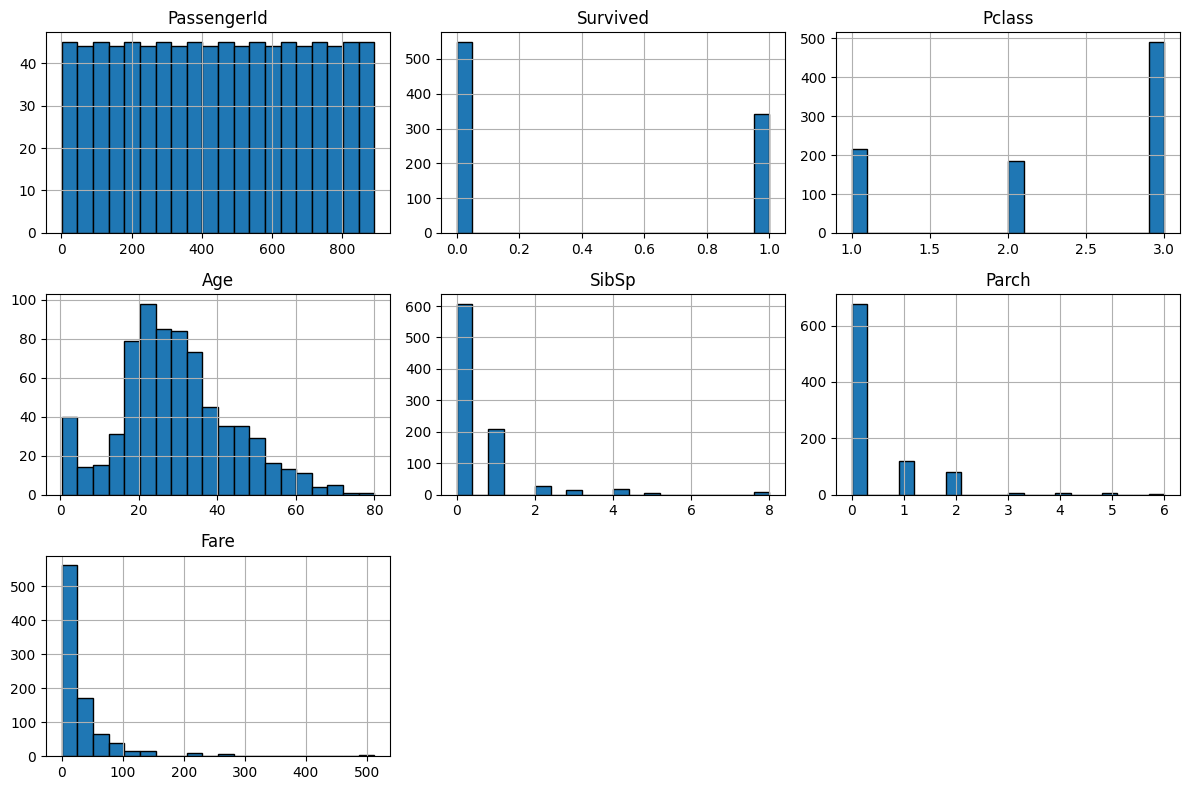

In [4]:
# Plot histograms for all numerical features in the training dataset
# figsize defines the size of the plot, bins controls the number of bins in histogram
# edgecolor makes the bin borders visible
train_df.hist(figsize=(12, 8), bins=20, edgecolor='black')

# Adjusts subplot params so plots fit into the figure area nicely
plt.tight_layout()

# Show the histogram plots
plt.show()

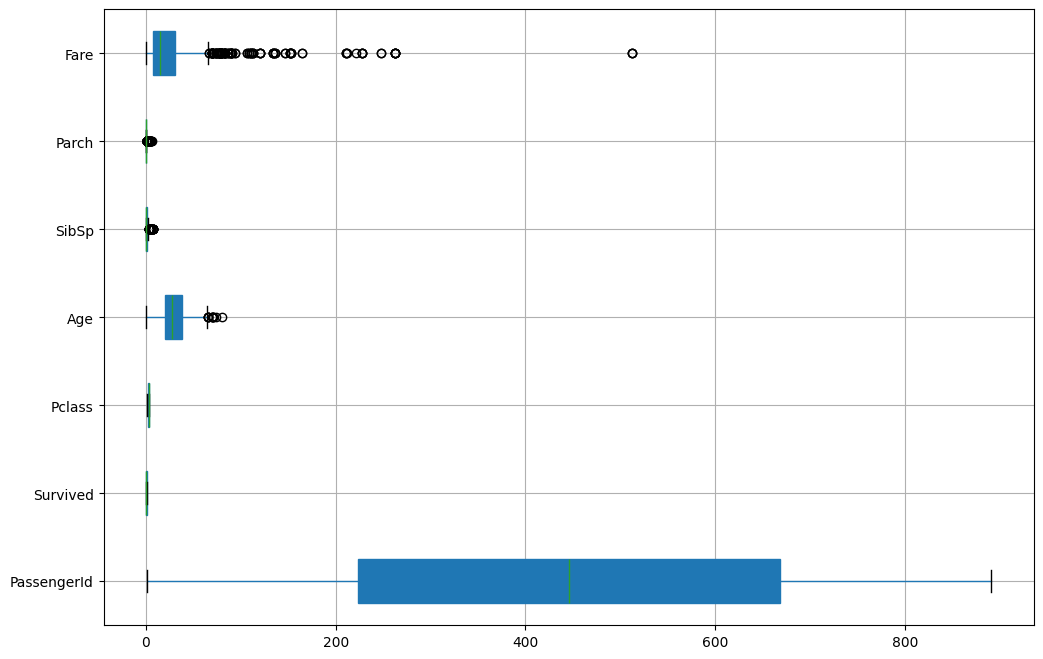

In [5]:
# Create boxplots for all numerical features to visualize distribution and detect outliers
# figsize sets the plot size, vert=False makes the boxplots horizontal, patch_artist=True fills the boxes with color
train_df.boxplot(figsize=(12, 8), vert=False, patch_artist=True)

# Show the boxplots
plt.show()

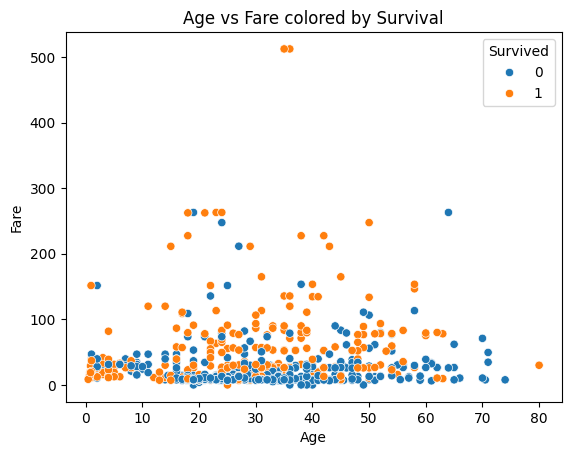

In [6]:
# Scatter plot showing the relationship between 'Age' and 'Fare' with points colored by 'Survived' status
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)

# Add a title to the scatter plot
plt.title('Age vs Fare colored by Survival')

# Show the scatter plot
plt.show()

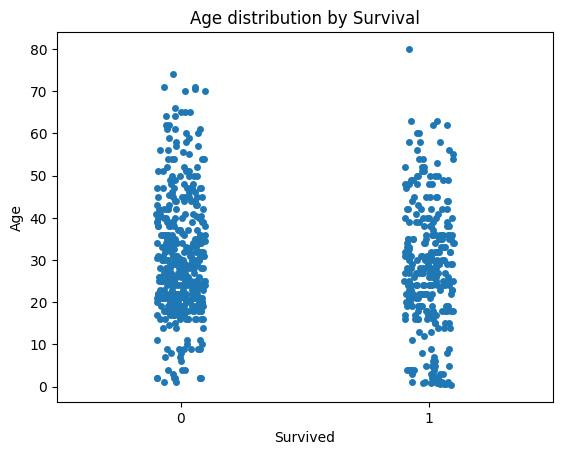

In [7]:
# Strip plot showing distribution of 'Age' grouped by 'Survived' with some jitter for better visibility
sns.stripplot(x='Survived', y='Age', data=train_df, jitter=True)

# Add a title to the strip plot
plt.title('Age distribution by Survival')

# Show the strip plot
plt.show()

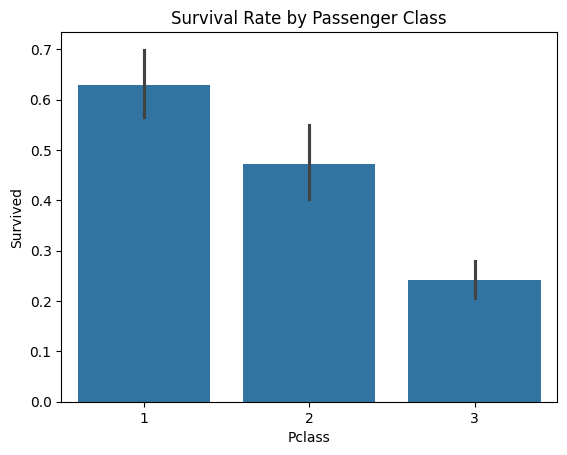

In [8]:
# Bar plot showing average survival rate for each passenger class (Pclass)
sns.barplot(x='Pclass', y='Survived', data=train_df)

# Add a title to the bar plot
plt.title('Survival Rate by Passenger Class')

# Show the bar plot
plt.show()

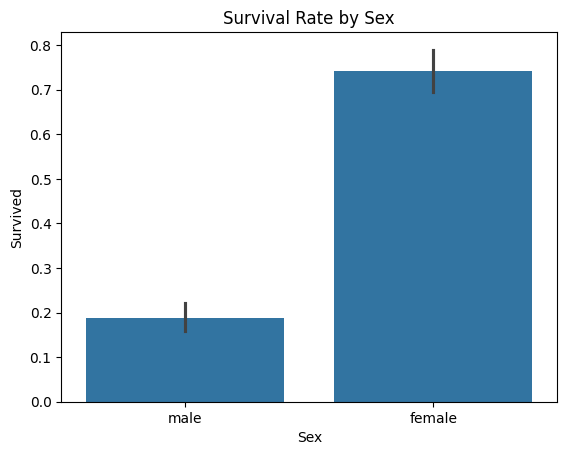

In [9]:
# Bar plot showing average survival rate by gender (Sex)
sns.barplot(x='Sex', y='Survived', data=train_df)

# Add a title to the bar plot
plt.title('Survival Rate by Sex')

# Show the bar plot
plt.show()

**Data Preprocessing:**

1.Impute missing values.

2.Encode categorical variables using one-hot encoding or label encoding.

3.If needed you can apply more preprocessing methods on the given dataset.

In [10]:
# Print the list of column names in the training DataFrame
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
# Fill missing values in the 'Age' column with the median age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# Fill missing values in the 'Embarked' column with the most frequent value (mode)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [12]:
# Print the count of remaining missing values in each column after filling
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [13]:
# Initialize a LabelEncoder to convert categorical text labels into numeric values
le = LabelEncoder()

# Transform 'Sex' column from categorical ('male', 'female') to numeric (0, 1)
train_df['Sex'] = le.fit_transform(train_df['Sex'])

In [14]:
# Convert categorical 'Embarked' column into dummy/indicator variables (one-hot encoding)
# drop_first=True avoids dummy variable trap by dropping the first category
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

In [15]:
# Print unique values in the transformed 'Sex' column to confirm encoding
print(train_df['Sex'].unique())

# Print the list of new columns created for 'Embarked' after one-hot encoding
print([col for col in train_df.columns if 'Embarked' in col])

[1 0]
['Embarked_Q', 'Embarked_S']


In [16]:
# Create a new feature 'FamilySize' by combining number of siblings/spouses and parents/children onboard plus 1 (self)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [17]:
# Initialize a StandardScaler to normalize numerical features to have mean=0 and variance=1
scaler = StandardScaler()

# Apply scaling transformation to 'Age' and 'Fare' columns for better model performance
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

In [18]:
# Print the updated list of columns after preprocessing and feature engineering
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S',
       'FamilySize'],
      dtype='object')


**Building Predictive Models:**

1.Split the preprocessed dataset into training and testing sets.

2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3.Build predictive models using LightGBM and XGBoost algorithms.

4.Train the models on the training set and evaluate their performance on the testing set.

5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [19]:
# Drop unnecessary columns and define features (X) and target variable (y)
X = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = train_df['Survived']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Print the shapes of training and test sets
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (712, 9)
Test shape : (179, 9)


In [21]:
# Initialize LightGBM model with specific parameters
lgb_model = lgb.LGBMClassifier(
    min_child_samples=20,
    min_split_gain=0.1,
    max_depth=7,
    n_estimators=100,
    verbosity=-1  # Suppress detailed output
)

# Initialize basic XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')  # Specify evaluation metric

In [22]:
# Train LightGBM model and make predictions
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

# Evaluate LightGBM model performance
print("LightGBM Performance:")
print("Accuracy :", accuracy_score(y_test, lgb_preds))
print("Precision:", precision_score(y_test, lgb_preds))
print("Recall   :", recall_score(y_test, lgb_preds))
print("F1 Score :", f1_score(y_test, lgb_preds))

LightGBM Performance:
Accuracy : 0.8268156424581006
Precision: 0.7945205479452054
Recall   : 0.7837837837837838
F1 Score : 0.7891156462585034


In [23]:
# Train XGBoost model and make predictions
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
print("\nXGBoost Performance:")
print("Accuracy :", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall   :", recall_score(y_test, xgb_preds))
print("F1 Score :", f1_score(y_test, xgb_preds))


XGBoost Performance:
Accuracy : 0.8156424581005587
Precision: 0.7808219178082192
Recall   : 0.7702702702702703
F1 Score : 0.7755102040816326


In [24]:
# Hyperparameter tuning for LightGBM using GridSearchCV
model = LGBMClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [15, 31],
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [15, 31]},
             scoring='f1')

In [25]:
# Print best parameters for LightGBM
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 15}


In [26]:
# Predict using best LightGBM model
y_pred = grid.best_estimator_.predict(X_test)

In [27]:
# Evaluate tuned LightGBM model
print("Tuned LightGBM Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Tuned LightGBM Performance:
Accuracy : 0.8324022346368715
Precision: 0.8055555555555556
Recall   : 0.7837837837837838
F1 Score : 0.7945205479452054


In [28]:
# Hyperparameter tuning for XGBoost using GridSearchCV
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [29]:
# Get the best XGBoost model and make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [30]:
# Evaluate tuned XGBoost model
print("Tuned XGBoost Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Tuned XGBoost Performance:
Accuracy : 0.8100558659217877
Precision: 0.8225806451612904
Recall   : 0.6891891891891891
F1 Score : 0.75


**Comparative Analysis:**

1.Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

2.Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [31]:
# Define evaluation scores for LightGBM
lgb_accuracy = 0.8324
lgb_precision = 0.8056
lgb_recall = 0.7838
lgb_f1 = 0.7945

In [32]:
# Define evaluation scores for XGBoost
xgb_accuracy = 0.8101
xgb_precision = 0.8226
xgb_recall = 0.6892
xgb_f1 = 0.75

In [33]:
# Create a dictionary to store the metrics for both models
comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
}

In [34]:
# Convert the dictionary into a DataFrame for better display
df_comparison = pd.DataFrame(comparison)

In [35]:
# Print the comparison table
print(df_comparison)

      Metric  LightGBM  XGBoost
0   Accuracy    0.8324   0.8101
1  Precision    0.8056   0.8226
2     Recall    0.7838   0.6892
3   F1 Score    0.7945   0.7500


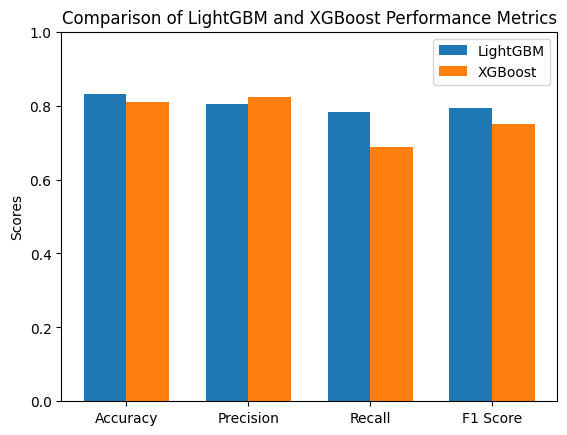

In [36]:
# Prepare data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [0.8324, 0.8056, 0.7838, 0.7945]
xgb_scores = [0.8101, 0.8226, 0.6892, 0.75]

# Set the position of bars on the x-axis
x = np.arange(len(metrics))
width = 0.35  # Width of the bars

# Create a bar plot to compare the models
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM')  # LightGBM bars
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost')   # XGBoost bars

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Comparison of LightGBM and XGBoost Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Set y-axis range from 0 to 1
plt.ylim([0, 1])

# Display the plot
plt.show()

- LightGBM
 - Strengths:
  1. Higher accuracy (83.24%) — better overall correct predictions.
  2. Higher recall (78.38%) — better at identifying actual positives (fewer false negatives).
  3. Higher F1 score (79.45%) — good balance between precision and recall.
  4. Faster training and efficient with large datasets.
 - Weaknesses:
  1. Slightly lower precision (80.56%) — more false positives compared to XGBoost.

- XGBoost
 - Strengths:
 1. Higher precision (82.26%) — fewer false positives, more reliable positive predictions.
 2. Robust and widely used with strong community support.
 - Weaknesses:
 1. Lower recall (68.92%) — misses more actual positive cases.
 2. Slightly lower accuracy (81.01%) and F1 score (75%) — less balanced overall performance.